<a href="https://colab.research.google.com/github/changsin/AI/blob/main/Dive_into_Deep_Learning_Coding_Session_1_%E2%80%93_Setup_%26_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dive into Deep Learning: Coding Session \#1 – Setup & MLP

---

## 1. A Primer for pytorch

pytorch has tensors very similar to arrays in numpy.

In [ ]:
import torch
import random

import pylab as plt
plt.style.use('dark_background')

We generate a tensor named `my_tensor` with shape (3,4) with 3 rows, 4 columns, filled with random values. You can also check the `type` and `dtype` of `my_tensor`.

In [ ]:
my_tensor = torch.rand(size=(3,4))

In [ ]:
print(my_tensor)

tensor([[0.5909, 0.1351, 0.7020, 0.2537],
        [0.8742, 0.1426, 0.7305, 0.5548],
        [0.8120, 0.2610, 0.2342, 0.0405]])


In [ ]:
type(my_tensor)

torch.Tensor

In [ ]:
my_tensor.dtype

torch.float32

### Try using `torch.randn` with different shapes!

In [ ]:
torch.randn(3,4)

tensor([[-0.9493,  0.5587, -1.1773,  0.6277],
        [ 0.0902, -0.9720, -0.4847,  0.7238],
        [ 1.1310, -0.0766,  2.5303,  0.8667]])

### Autograd

Pytorch also allows us to compute gradients using autograd. This requires `requires_grad=True` added to the torch tensors.

In [ ]:
a = torch.tensor([4.], requires_grad=True)
b = torch.tensor([12.], requires_grad=True)

In [ ]:
print(a)
print(b)

tensor([4.], requires_grad=True)
tensor([12.], requires_grad=True)


In [ ]:
print(a.grad)
print(b.grad)

None
None


We can now perform mathematical operations and Pytorch will keep track of what's being done to each variable and will compute gradients!

Let's do $$ y = a^3 - b^2$$

In [ ]:
y = a**3 - b**2

In [ ]:
print(y)

tensor([-80.], grad_fn=<SubBackward0>)


We can compute $\frac{\partial y}{\partial a} = 3 a^2 = 48$ and $\frac{\partial y}{\partial b} = -2b = 24$ as follows:

To compute the gradients use the `.backward()` method, and the grad values are available via `a.grad` and `b.grad`.

In [ ]:
y.backward()

In [ ]:
print(a.grad)
print(b.grad)

tensor([48.])
tensor([-24.])


### Try $y = sin((a+b)^2)$ and compute $\partial y / \partial a$ and $\partial y / \partial b$

In [ ]:
y = torch.sin((a+b)**2)

In [ ]:
y.backward()

In [ ]:
a.grad, b.grad

(tensor([46.7267]), tensor([-25.2733]))

## 2. Linear Regression

- prediction: $\hat{y}$
- weights: $\mathbf{w}$
- feature vector: $\mathbf{x}$
- bias: $b$

The model is defined by:
$$\hat{y} = \mathbf{w}^\mathrm{T} \mathbf{x} + b$$

In [ ]:
def model(X, w, b):
    """your model"""
    return torch.matmul(X, w) + b

We first generate some synthetic data with 1000 data points $$\mathbf{w} = \{2, -3.4\}$$ and $$b = 4.2$$

We also add Gaussian Noise with 0 mean and $0.01$ standard deviation.

*hint*: use `torch.matmul` for $\mathbf{w}^\mathrm{T} \mathbf{x}$ and `torch.normal` for the noise.

In [ ]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)

    return X, y.reshape((-1,1))

In [ ]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [ ]:
features, labels

(tensor([[ 0.0596,  0.4525],
         [-0.4065,  2.3302],
         [-0.8148, -0.5281],
         ...,
         [-0.9836,  1.7068],
         [ 0.5465,  0.4055],
         [-0.4106, -0.1955]]), tensor([[ 2.7941],
         [-4.5301],
         [ 4.3576],
         [ 4.5212],
         [ 5.2273],
         [ 6.5129],
         [ 0.1071],
         [ 4.8692],
         [ 1.7759],
         [ 3.6111],
         [ 7.8249],
         [ 4.8064],
         [11.2382],
         [ 5.9598],
         [ 6.7361],
         [ 5.6581],
         [-3.7886],
         [ 3.4498],
         [ 4.4129],
         [-0.8932],
         [ 7.6443],
         [ 4.9733],
         [ 9.6381],
         [ 9.9245],
         [ 1.7110],
         [ 5.6821],
         [12.3799],
         [ 5.3097],
         [ 5.1378],
         [-3.9210],
         [ 9.7566],
         [ 4.2428],
         [ 7.9671],
         [ 4.7039],
         [ 9.5568],
         [-2.7433],
         [ 3.2323],
         [-0.9246],
         [ 3.3579],
         [-0.3106],
         [ 

### Always Visualize your data!

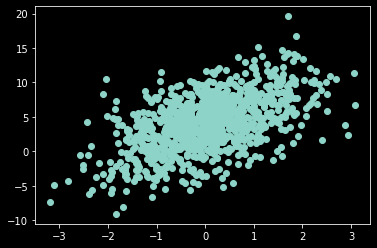

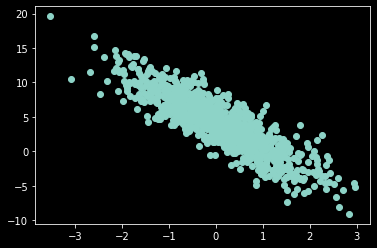

In [ ]:
plt.scatter(features[:,0], labels)
plt.show()

plt.scatter(features[:,1], labels)
plt.show()

Here is a function to help you create batches!

In [ ]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i +
                                                   batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

### Test out this `data_iter` by visulaizing it!

In [ ]:
data_generator = data_iter(25, features, labels)

In [ ]:
data_generator

<generator object data_iter at 0x7fda08c48650>

In [ ]:
batch_features, batch_labels = next(data_generator)

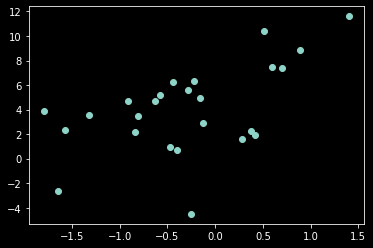

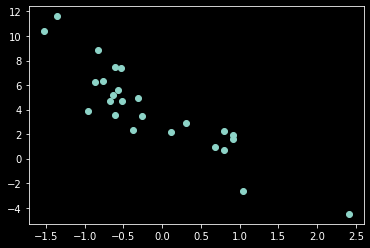

In [ ]:
plt.scatter(batch_features[:,0], batch_labels)
plt.show()

plt.scatter(batch_features[:,1], batch_labels)
plt.show()

### Loss Function

$$\mathrm{L}(\mathbf{w}, b) = \frac{1}{n} \sum_i^n l^{(i)}(\mathbf{w}, b)$$

Here $$l^{(i)} = \frac{1}{2} \Big( \hat{y}^{(i)} - y^{(i)}\Big)^2$$

In [ ]:
def loss_function(y_hat, y):
    """ your loss function """
    return 0.5*(y_hat - y)**2

### Gradient Descent

- Learning rate: $\eta$
- Batch size: $\vert \mathcal{B} \vert$

$$\mathbf{w}  =  \mathbf{w} - \frac{\eta}{\vert \mathcal{B} \vert} \partial_\mathbf{w} l^{(i)}(\mathbf{w}, b)$$

$$b  =  b - \frac{\eta}{\vert \mathcal{B} \vert} \partial_b l^{(i)}(\mathbf{w}, b)$$

Define a small learning rate ($\eta$), and randomly initiate $\mathbf{w}$ and $b$.

In [ ]:
learning_rate = 0.01

w = torch.rand(2,1, requires_grad=True)

b = torch.rand(1, requires_grad= True)

print(w)

print(b)

tensor([[0.9499],
        [0.2205]], requires_grad=True)
tensor([0.3959], requires_grad=True)


Finally the training loop!

**NOTE**: You would have to use `torch.no_grad()` and `w.grad.zero_()`

In [ ]:
for epoch in range(100):
    for X,Y in data_iter(10, features, labels):
        output = model(X, w, b)
        loss = loss_function(output, Y).sum()
        loss.backward()
        # print("w & b")
        # print(w, b)
        # print("grad w & b")
        # print(w.grad, b.grad)
        with torch.no_grad():
            w -= learning_rate* w.grad/len(Y)
            b -= learning_rate* b.grad/len(Y)
            w.grad.zero_()
            b.grad.zero_()
    print(loss)

tensor(19.4020, grad_fn=<SumBackward0>)
tensor(3.5854, grad_fn=<SumBackward0>)
tensor(0.4924, grad_fn=<SumBackward0>)
tensor(0.0708, grad_fn=<SumBackward0>)
tensor(0.0066, grad_fn=<SumBackward0>)
tensor(0.0011, grad_fn=<SumBackward0>)
tensor(0.0018, grad_fn=<SumBackward0>)
tensor(0.0008, grad_fn=<SumBackward0>)
tensor(0.0006, grad_fn=<SumBackward0>)
tensor(0.0005, grad_fn=<SumBackward0>)
tensor(0.0009, grad_fn=<SumBackward0>)
tensor(0.0002, grad_fn=<SumBackward0>)
tensor(0.0004, grad_fn=<SumBackward0>)
tensor(0.0004, grad_fn=<SumBackward0>)
tensor(0.0007, grad_fn=<SumBackward0>)
tensor(0.0002, grad_fn=<SumBackward0>)
tensor(0.0005, grad_fn=<SumBackward0>)
tensor(0.0007, grad_fn=<SumBackward0>)
tensor(0.0003, grad_fn=<SumBackward0>)
tensor(0.0003, grad_fn=<SumBackward0>)
tensor(0.0004, grad_fn=<SumBackward0>)
tensor(0.0004, grad_fn=<SumBackward0>)
tensor(0.0002, grad_fn=<SumBackward0>)
tensor(0.0003, grad_fn=<SumBackward0>)
tensor(0.0005, grad_fn=<SumBackward0>)
tensor(0.0006, grad_fn=<

In [ ]:
print(w, true_w)
print(b, true_b)

tensor([[ 2.0002],
        [-3.3997]], requires_grad=True) tensor([ 2.0000, -3.4000])
tensor([4.2001], requires_grad=True) 4.2


## 3. Let's make a neural network now!

- prediction: $\hat{y}$
- weights: $\mathbf{w}$
- feature vector: $\mathbf{x}$
- bias: $b$
- activation funtion (ReLU): $\Phi$

$$\Phi(x) = \mathrm{max}(0,x)$$

and for each neuron:

$$\hat{y} = \Phi \Big( \mathbf{w}^\mathrm{T} \mathbf{x} + b \Big)$$


We will build a neural network which
- takes 2 inputs
- has two hidden layers
    - first layer has 10 neurons
    - second layer has 5
    - both layers have ReLU activation

Here are two functions to help you!


In [ ]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

def update_params(params):
    with torch.no_grad():
        for param in params:
            param -= param.grad*learning_rate/len(Y)
            param.grad.zero_()
    return params

Now create the parameters for learning, create the model and a list of parameters!

In [ ]:
hidden_units_1 = 10

hidden_units_2 = 5

w1 = torch.rand(2, hidden_units_1, requires_grad=True)
b1 = torch.rand(hidden_units_1, requires_grad=True)

w2 = torch.rand(hidden_units_1, hidden_units_2, requires_grad=True)
b2 = torch.rand(hidden_units_2, requires_grad=True)

w3 = torch.rand(hidden_units_2, 1, requires_grad=True)
b3 = torch.rand(1, requires_grad=True)

def model(X):
    """ your model"""
    hidden_layer_1 = relu(torch.matmul(X, w1) + b1)
    hidden_layer_2 = relu(torch.matmul(hidden_layer_1, w2) + b2)
    return torch.matmul(hidden_layer_2, w3) + b3


params = [w1, b1, w2, b2, w3, b3]

In [ ]:
for epoch in range(100):
    for X,Y in data_iter(10, features, labels):
        output = model(X)
        loss = loss_function(output, Y).sum()
        loss.backward()
        params = update_params(params)
    print(loss)

tensor(0.6274, grad_fn=<SumBackward0>)
tensor(0.4587, grad_fn=<SumBackward0>)
tensor(0.6125, grad_fn=<SumBackward0>)
tensor(0.5013, grad_fn=<SumBackward0>)
tensor(0.2174, grad_fn=<SumBackward0>)
tensor(0.3604, grad_fn=<SumBackward0>)
tensor(0.2219, grad_fn=<SumBackward0>)
tensor(2.2923, grad_fn=<SumBackward0>)
tensor(0.2386, grad_fn=<SumBackward0>)
tensor(0.9148, grad_fn=<SumBackward0>)
tensor(0.2707, grad_fn=<SumBackward0>)
tensor(0.3655, grad_fn=<SumBackward0>)
tensor(0.4525, grad_fn=<SumBackward0>)
tensor(0.8720, grad_fn=<SumBackward0>)
tensor(0.2609, grad_fn=<SumBackward0>)
tensor(0.2254, grad_fn=<SumBackward0>)
tensor(0.2970, grad_fn=<SumBackward0>)
tensor(0.1512, grad_fn=<SumBackward0>)
tensor(0.0938, grad_fn=<SumBackward0>)
tensor(0.2109, grad_fn=<SumBackward0>)
tensor(0.1392, grad_fn=<SumBackward0>)
tensor(0.8185, grad_fn=<SumBackward0>)
tensor(0.1492, grad_fn=<SumBackward0>)
tensor(0.6962, grad_fn=<SumBackward0>)
tensor(0.2793, grad_fn=<SumBackward0>)
tensor(0.1720, grad_fn=<S

## 4. Concise Pytorch implementation

In [ ]:
net = torch.nn.Sequential(
    torch.nn.Linear(2, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 5),
    torch.nn.ReLU(),
    torch.nn.Linear(5, 1)
    )

In [ ]:
print(net)

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=5, bias=True)
  (3): ReLU()
  (4): Linear(in_features=5, out_features=1, bias=True)
)


In [ ]:
loss_function = torch.nn.MSELoss(reduction='sum')
trainer = torch.optim.SGD(net.parameters(), lr = 0.00001)

In [ ]:
for epoch in range(50):
    for X,Y in data_iter(100, features, labels):
        trainer.zero_grad()
        outputs = net(X)
        loss = loss_function(outputs, Y)
        loss.backward()
        trainer.step()
    print(loss)

tensor(2730.7087, grad_fn=<MseLossBackward>)
tensor(2794.7493, grad_fn=<MseLossBackward>)
tensor(3338.2866, grad_fn=<MseLossBackward>)
tensor(2865.1838, grad_fn=<MseLossBackward>)
tensor(3227.1128, grad_fn=<MseLossBackward>)
tensor(2969.1445, grad_fn=<MseLossBackward>)
tensor(3014.8574, grad_fn=<MseLossBackward>)
tensor(2441.9170, grad_fn=<MseLossBackward>)
tensor(2367.4683, grad_fn=<MseLossBackward>)
tensor(2394.4739, grad_fn=<MseLossBackward>)
tensor(2702.0715, grad_fn=<MseLossBackward>)
tensor(2305.9065, grad_fn=<MseLossBackward>)
tensor(1705.6842, grad_fn=<MseLossBackward>)
tensor(1881.9066, grad_fn=<MseLossBackward>)
tensor(1428.4987, grad_fn=<MseLossBackward>)
tensor(1533.7686, grad_fn=<MseLossBackward>)
tensor(1199.3723, grad_fn=<MseLossBackward>)
tensor(954.9359, grad_fn=<MseLossBackward>)
tensor(890.5870, grad_fn=<MseLossBackward>)
tensor(1013.6218, grad_fn=<MseLossBackward>)
tensor(499.5142, grad_fn=<MseLossBackward>)
tensor(568.0511, grad_fn=<MseLossBackward>)
tensor(459.180